# Análise exploratória de locação de casas na cidade de São Paulo - Brasil

Os aluguéis na cidade de São Paulo possuem uma ampla variadade de opções, preços, localizações, atendendo as mais diversas opções. Este estudo visa fornecer insights valiosos sobre os aluguéis na cidade de São Paulo. Dispomos de um conjunto de dados abrangente que inclui informações, como o número de quartos, banheiros, a localização, a disponibilidade de garagem e diversos outros detalhes sobre propriedades disponíveis para locação na cidade.

Usaremos a príncipio analises descritivas e visuais dos dados, o que possibilitará no futura a implementação de Machine Learning.


### Base de dados

Os dados utilizados na análise foram obtidos por meio do web scrapping do site Quinto Andar, considerada a maior imobiliária digital do Brasil.

Os dados foram agrupados em um arquivo csv denominado 'RentSaoPaulo'. Nele temos as seguintes informações disponíveis:

- a) address - Endereço da propriedade
- b) district - Bairro da cidade
- c) area - Área da propriedade em metros quadrados
- d) bedrooms - Número de quartos
- e) garage - Possui garagem ou não (1 - Sim/0 - Não)
- f) type - Tipo de imóvel
- g) rent - Oferta de aluguel no site
- h) total - Preço total, incluindo aluguel, taxas e outros impostos



## 0. Importando bibliotecas e Datasets

In [1]:

# Importando as bibliotecas

import pandas as pd
import numpy as np 

# Bibliotecas para EDA
import matplotlib.pyplot as plt #gráfico estático
import seaborn as sns
import plotly.express as px #gráficos interativos
import plotly.graph_objects as go


# Configurar o estilo de gráfico do ggplot (pacote do R)
plt.style.use("ggplot")

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:

# Importando o Dataset

df = pd.read_csv('RentSaoPaulo.csv')

In [3]:
df.head()

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11657 entries, 0 to 11656
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   address   11657 non-null  object
 1   district  11657 non-null  object
 2   area      11657 non-null  int64 
 3   bedrooms  11657 non-null  int64 
 4   garage    11657 non-null  int64 
 5   type      11657 non-null  object
 6   rent      11657 non-null  int64 
 7   total     11657 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 728.7+ KB


**Não temos valores ausentes no Dataset, fator que facilita a análise e nos permite acesso a uma quantidade razoável de dados**

In [5]:
print(f'O apartamento possui {df.shape[0]} linhas e {df.shape[1]} colunas')

O apartamento possui 11657 linhas e 8 colunas


In [6]:
# Definimos os tipos de variáveis do nosso Dataset

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numericas = df.select_dtypes(include=numerics)

nao_numericas = df.select_dtypes(exclude=numerics)

print(f'Temos {numericas.shape[1]} colunas numéricas e {nao_numericas.shape[1]} não numéricas')

Temos 5 colunas numéricas e 3 não numéricas


In [7]:
df.dtypes

address     object
district    object
area         int64
bedrooms     int64
garage       int64
type        object
rent         int64
total        int64
dtype: object

## 1. Tratando os dados

In [8]:
df.duplicated().sum()

0

**Não possuimos dados duplicados**

**O dataset parece estar em condições ideias de análise, não necessitando a príncipio de qualquer tratamento**


## 2. Análise exploratória

#### 2.1 Análise Univariada

Nessa etapa avaliaremos as variáveis individualmente, com a intenção de entender melhor os dados e fazer melhor uso deles em análises futuras. Vale ressaltar que durante a análise exploratória alguns erros foram encontrados e devidamente tratados.

###### 2.1.1 Variável rent e total

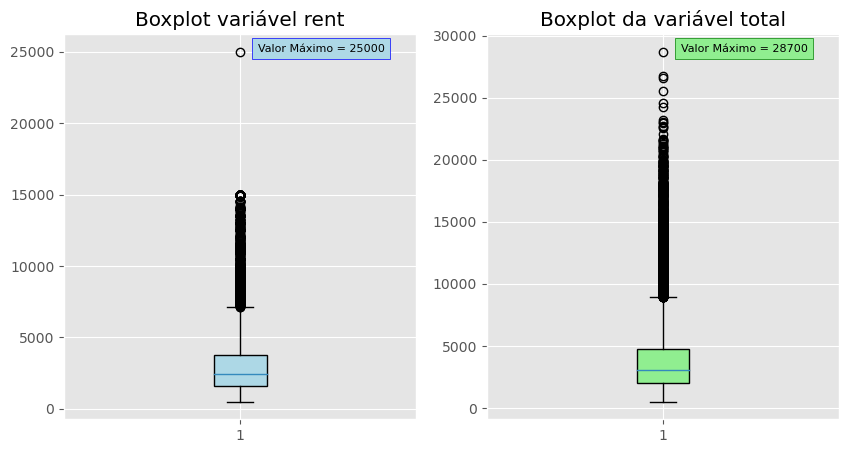

In [9]:
# Utilizando layout do Ggplot(biblioteca do R, utilizando como padrão no matplotlib)


fig, axs = plt.subplots(1, 2, figsize = (10, 5)) #dois gráficos em uma linha

#Define um boxplot para variável 'rent' no primeiro subplot
boxplot1 = axs[0].boxplot(df['rent'], patch_artist = True) #permite personalizar a cor do boxplot
axs[0].set_title('Boxplot variável rent')

#Cor do boxplot
boxplot1['boxes'][0].set_facecolor('lightblue')

# Adiciona a legenda do valor máximo
max_rent = np.max(df['rent'])
axs[0].annotate(f'Valor Máximo = {max_rent}',  #cria uma anotação no primeiro subplot
                xy=(1, max_rent),              #Coordenadas x, y da anotação
                xytext=(1.05, max_rent),       #Texto ligeiramente a direita
                bbox=dict(facecolor='lightblue', edgecolor='blue'),   #Propriedade da anotação, cor de preenchimento e borda
                fontsize=8) # Modifica a fonte para um tamanho menor

# Cria um boxplot para a variável 'total' no segundo subplot
boxplot2 = axs[1].boxplot(df['total'], patch_artist=True)
axs[1].set_title('Boxplot da variável total')

# Define a cor do boxplot
boxplot2['boxes'][0].set_facecolor('lightgreen')

# Adiciona a legenda do valor máximo
max_total = np.max(df['total']) # Pega o valor maximo do campo total
axs[1].annotate(f'Valor Máximo = {max_total}', 
                xy=(1, max_total), 
                xytext=(1.05, max_total),
                bbox=dict(facecolor='lightgreen', edgecolor='green'),
                fontsize=8) # Modifica a fonte para um tamanho menor

# Mostra os gráficos
plt.show()


Para não deixar os gráficos poluidos, as estatística descritivas de média, mediana, Quartis e DP serão fornecidos abaixo:

In [10]:
print(f'Rent:\n'
        f'Média: R${df["rent"].mean():.2f}\n'  
        f'Q1: R${np.percentile(df["rent"], 25):.2f}\n'
        f'Mediana(Q2): R${df["rent"].median():.2f}\n'
        f'Q3: R${np.percentile(df["rent"],75):.2f}\n'  
        f'DP: R${df["rent"].std():.2f}\n')

print(f'Total:\n'
        f'Média: R${df["total"].mean():.2f}\n'  
        f'Q1: R${np.percentile(df["total"], 25):.2f}\n'
        f'Mediana(Q2): R${df["total"].median():.2f}\n'
        f'Q3: R${np.percentile(df["total"],75):.2f}\n'
        f'DP: R${df["total"].std():.2f}\n')

Rent:
Média: R$3250.81
Q1: R$1590.00
Mediana(Q2): R$2415.00
Q3: R$3800.00
DP: R$2650.71

Total:
Média: R$4080.03
Q1: R$1996.00
Mediana(Q2): R$3057.00
Q3: R$4774.00
DP: R$3352.48



**Outra forma de calcular as estatísticas descritivas:**

In [11]:
df[['rent', 'total']].describe().T

,count,mean,std,min,25%,50%,75%,max
rent,11657.0,3250.814789,2650.711557,500.0,1590.0,2415.0,3800.0,25000.0
total,11657.0,4080.030625,3352.480274,509.0,1996.0,3057.0,4774.0,28700.0


**Como funcionam os boxplots?**

Os boxplots são divididos em três faixas denominados quartis. Para conseguir defini-los é necessário ordenar os dados númericos de maneira crescente.

- O 1° Quartil separa os 25% menores valores dos demais
- O 2° Quartil separa os 50% menores valores dos demais, também chamado de mediana
- O 3° Quartil separa os 75% menores valores dos demais

Além disso, temos duas faixas na parte superior e inferior, valores acima ou abaixo respectivamente desses valores são considerados Outiliers. O cálculo para o posicionamento dessas faixas é o seguinte:

- IQ (Intervalo interquartil) = Q3 - Q1
- Faixa superior = Q3 + (1,5 * IQ)
- Faixa inferior = Q1 - (1,5 * IQ)


**Conclusões**

O boxplot por si só demonstra o tipo de assimetria presente nos dados, nesse caso ambas as distribuições são assimétricas a direita, ou seja, muitos dados a esquerda e poucos a direita. Ademais, os Outiliers acabam por afetar o valor da **média**, gerando uma tendência a um valor elevado, não sendo a melhor medida de centro, utilize a **medidana**, a qual acaba por ser menor afetado por esses valores elevados.

- 75% dos alugueis tem valores abaixo de R$ 3800,00 (grande maioria)
- Média elevada devido aos Outiliers 
- Essa grande variação também afeta o DP.


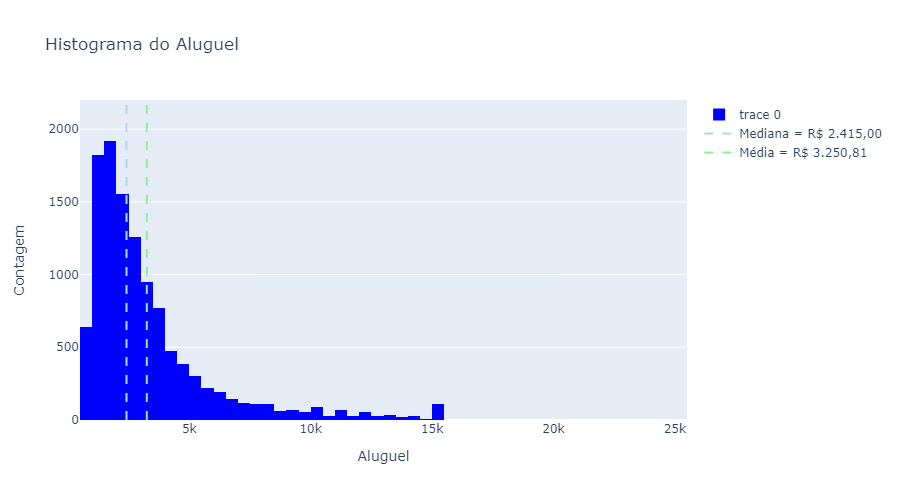

O histograma só confirma as características da distribuição citadas acima. 
Deve-se observar a presença de um valor Outilier, bem distinto dos demais.


In [12]:
import plotly.graph_objs as go

mediana_rent = df.rent.median()
media_rent = df.rent.mean()

mediana_rent_format = (
    "R$ {:,.2f}".format(mediana_rent)
    .replace(",", "v")
    .replace(".", ",")
    .replace("v", ".")
)

media_rent_format = (
    "R$ {:,.2f}".format(media_rent)
    .replace(",", "v")
    .replace(".", ",")
    .replace("v", ".")
)


data = [go.Histogram(x=df.rent, 
                     nbinsx=50, 
                     marker=dict(color='blue'))]

line_1 = [go.Scatter(x=[mediana_rent, mediana_rent], 
                   y=[0, 2415], 
                   mode='lines',
                   line=dict(color='lightblue', dash='dash'), 
                   showlegend=True,
                   name=f"Mediana = {mediana_rent_format}")]

line_2 = [go.Scatter(x=[media_rent, media_rent], 
                   y=[0, 3251], 
                   mode='lines',
                   line=dict(color='lightgreen', dash='dash'), 
                   showlegend=True,
                   name=f"Média = {media_rent_format}")]

fig = go.Figure(data=data+line_1+line_2)

fig.update_layout(title_text='Histograma do Aluguel', 
                  xaxis_title='Aluguel',
                  yaxis_title='Contagem',
                  autosize=False, 
                  width=900, 
                  height=500)

fig.update_yaxes(range=[0, 2200])

fig.show(renderer="png")


print(f'O histograma só confirma as características da distribuição citadas acima. ')

print(f'Deve-se observar a presença de um valor Outilier, bem distinto dos demais.')

In [13]:
df[df['rent']>20000]

,address,district,area,bedrooms,garage,type,rent,total
6095,Avenida Chibarás,Planalto Paulista,24,1,0,Studio e kitnet,25000,26710


**Temos a presença de um valor que pode não estar correto, visto que as características não condizem com o valor exigido pelo aluguel. Como parece não estar correto (erro de digitação), o valor será removido do nosso Dataset**

In [14]:
#Removendo o valor incorreto

df = df[df['rent'] <= 20000]

In [15]:
df[['rent', 'total']].describe().T

,count,mean,std,min,25%,50%,75%,max
rent,11656.0,3248.948868,2643.158219,500.0,1590.0,2415.0,3800.0,15000.0
total,11656.0,4078.089139,3346.064103,509.0,1996.0,3056.5,4774.0,28700.0


**A remoção não teve grande impacto em nossos valores, logo manteremos os gráficos plotados anteriormente.**

#### 2.1.2 Variável area:

In [16]:
df.head()

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654


In [17]:
df['area'].describe()

count    11656.000000
mean        84.660861
std         74.021579
min          0.000000
25%         40.000000
50%         60.000000
75%         96.000000
max        580.000000
Name: area, dtype: float64

Com base nos dados, a média da área é de aproximadamente 84,6 metros quadrados. O desvio padrão possui um valor elevado, demonstrando uma grande variação.

Temos áreas de 0 metros quadrados, o que não pode existir, devemos analisar.

A distribuição é assimétrica, pois como se vê a média possui um valor superior ao Desvio Padrão devido aos altos valores presentes no lado direito da distribuição.

Grande quantidade dos dados presentes na distância interquartil (Q3 - Q1)

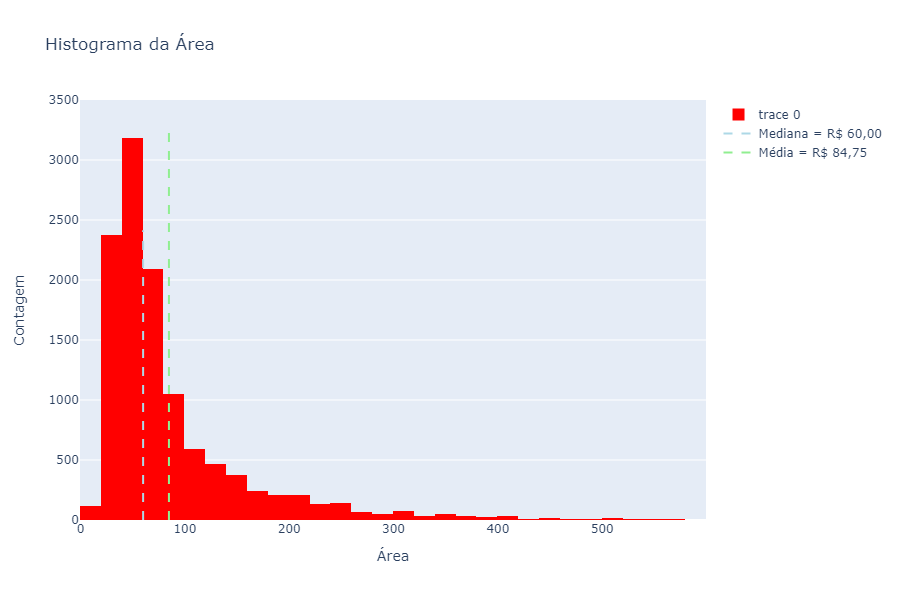

In [48]:
# import plotly.graph_objs as go

mediana_area = df.area.median()
media_area = df.area.mean()

mediana_area_format = (
    "R$ {:,.2f}".format(mediana_area)
    .replace(",", "v")
    .replace(".", ",")
    .replace("v", ".")
)

media_area_format = (
    "R$ {:,.2f}".format(media_area)
    .replace(",", "v")
    .replace(".", ",")
    .replace("v", ".")
)


data = [go.Histogram(x=df.area, 
                     nbinsx=50, 
                     marker=dict(color='red'))]

line_1 = [go.Scatter(x=[mediana_area, mediana_area], 
                   y=[0, 2415], 
                   mode='lines',
                   line=dict(color='lightblue', dash='dash'), 
                   showlegend=True,
                   name=f"Mediana = {mediana_area_format}")]

line_2 = [go.Scatter(x=[media_area, media_area], 
                   y=[0, 3251], 
                   mode='lines',
                   line=dict(color='lightgreen', dash='dash'), 
                   showlegend=True,
                   name=f"Média = {media_area_format}")]

fig = go.Figure(data=data+line_1+line_2)

fig.update_layout(title_text='Histograma da Área', 
                  xaxis_title='Área',
                  yaxis_title='Contagem',
                  autosize=False, 
                  width=900, 
                  height=600)

fig.update_yaxes(range=[0, 3500])

fig.show(renderer="png")

In [19]:
df[df['area']<10]

,address,district,area,bedrooms,garage,type,rent,total
962,Rua Engenheiro Bianor,Butantã,1,1,1,Studio e kitnet,2490,2987
1223,Rua Mussumés,Vila Maria Alta,5,1,0,Casa,570,594
2983,Rua Relíquia,Jardim das Laranjeiras,0,2,1,Apartamento,1600,2569
5323,Rua Solidônio Leite,Vila Ivone,2,2,2,Casa,2500,2711
7085,Rua Edmundo de Amicis,Morumbi,0,3,2,Casa,3200,3351
9898,Rua Visconde de Porto Seguro,Jardim dos Estados,1,4,3,Casa em condomínio,8500,11420
11055,Travessa Santa Filomena,Vila Campo Grande,4,1,0,Casa,630,641


**Temos sete valores com áreas inferiores a 10 metros quadrados. Não é possível observar alguma explicação plausível para uma área dessas, além dos altos valores que não condizem. Nesse caso por aparentar ser um erro optaremos pela exclusão dos valores**

In [20]:

#Excluindo dados

df = df[df['area']>10]

#### 2.1.3 Variável Quartos e garagens

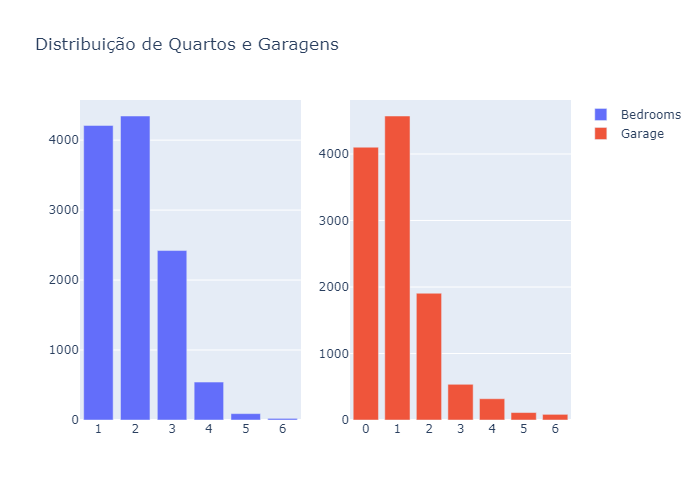

In [49]:
from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=2)
fig.add_trace(
    go.Bar(x=df['bedrooms'].value_counts().index, 
           y=df['bedrooms'].value_counts().values,
           name='Bedrooms'),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=df['garage'].value_counts().index, 
           y=df['garage'].value_counts().values,
           name='Garage'),
    row=1, col=2
)

fig.update_layout(title="Distribuição de Quartos e Garagens")

fig.update_xaxes(tickmode='linear')

fig.show(renderer="png")


**Pelos gráfico de número de quartos vemos que alguns possuem a denominação de 0. Isso parece ocorrer devido ao engano do locador em caracterizar o ambiente Studio e kitnet como um quarto, no caso de aparatamento e casa parece ter um erro de digitação.**

**Para corrigir esse erro optaremos por adicionar + 1 em quarto para os casos 'Studio e kitnet'**

**Para os tipos 'casas' e 'apartamentos' optaremos por eliminar os dados, mesmo que estes pouco afetem o resultado final**

In [22]:
df.loc[(df['bedrooms'] == 0)]

,address,district,area,bedrooms,garage,type,rent,total
71,Rua Natividade Saldanha,São Lucas,22,0,0,Studio e kitnet,900,1126
98,Rua Natividade Saldanha,São Lucas,19,0,0,Studio e kitnet,850,1052
163,Rua João José Pacheco,Jardim Vila Mariana,22,0,0,Studio e kitnet,2200,2808
259,Rua Riskallah Jorge,Centro Histórico de São Paulo,28,0,0,Studio e kitnet,1207,1647
476,Rua Doutor Miguel Vieira Ferreira,Tatuapé,30,0,0,Apartamento,1840,2113
493,Rua Natividade Saldanha,São Lucas,32,0,0,Studio e kitnet,1200,1532
569,Rua Albino Boldasso Gabril,Vila Cruzeiro,44,0,0,Studio e kitnet,1400,1598
604,Rua Natividade Saldanha,São Lucas,29,0,0,Studio e kitnet,1150,1452
631,Avenida São João,Santa Cecilia,35,0,0,Studio e kitnet,935,1348
708,Rua Doutor Albuquerque Lins,Santa Cecília,63,0,0,Studio e kitnet,1600,2186


In [23]:
df.loc[(df['bedrooms'] == 0) & (df['type'] == 'Studio e kitnet'), 'bedrooms'] += 1

In [24]:
condicao = (df['bedrooms'] == 0) & ((df['type'] == 'Casa') | (df['type'] == 'Apartamento'))

df = df[~condicao]

In [25]:
df[df['bedrooms']==0]

,address,district,area,bedrooms,garage,type,rent,total


**Como corrigimos esses imputs incorretos, plotaremos novamente o gráfico e as medidas resumo.**

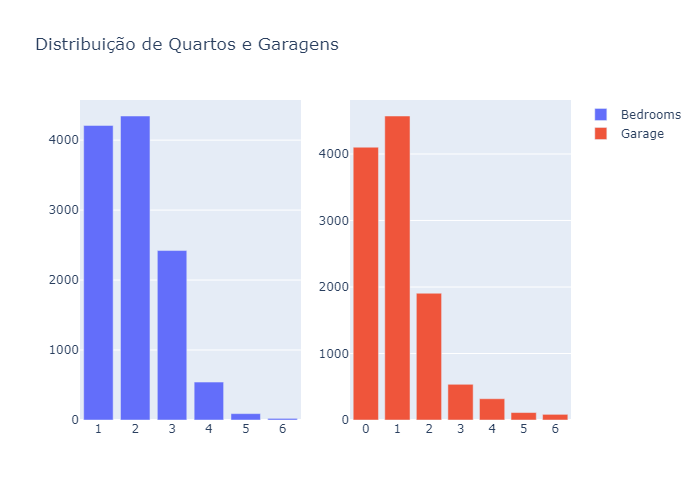

In [50]:
from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=2)
fig.add_trace(
    go.Bar(x=df['bedrooms'].value_counts().index, 
           y=df['bedrooms'].value_counts().values,
           name='Bedrooms'),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=df['garage'].value_counts().index, 
           y=df['garage'].value_counts().values,
           name='Garage'),
    row=1, col=2
)

fig.update_layout(title="Distribuição de Quartos e Garagens")

fig.update_xaxes(tickmode='linear')

fig.show(renderer="png")


##### 2.3.4 Variável Tipo de Imóvel

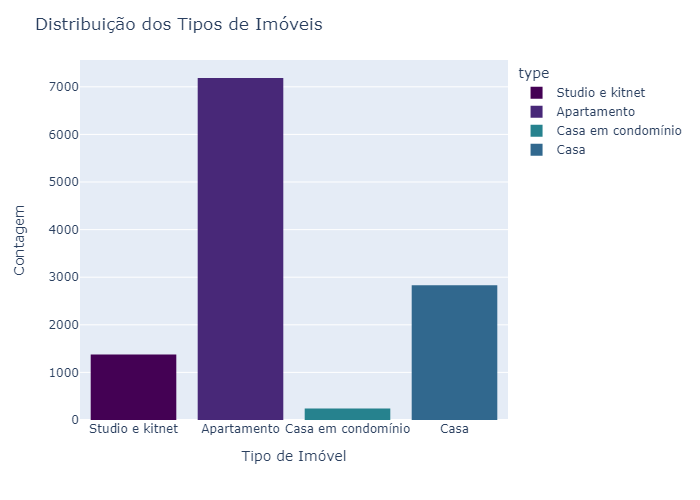

In [51]:
cores_por_tipo = {
    'Studio e kitnet':'#440154',
    'Apartamento':'#482878',
    'Casa em condomínio':'#26828e',
    'Casa':'#31688e'
}

fig = px.histogram(df, x="type", color="type", color_discrete_map=cores_por_tipo)
fig.update_layout(title="Distribuição dos Tipos de Imóveis", 
                  xaxis_title="Tipo de Imóvel", 
                  yaxis_title="Contagem")

fig.show(renderer="png")


**Aqui presenciamos uma predominância de apartamentos em relação a outros tipos de moradias, fato já esperado, visto a grande que são Paulo é uma cidade altamente povoada, o que na necessidade de imóveis mais compactos.**

**Quantos bairros possuimos no Dataset**


In [28]:
print(f'Temos {df.district.nunique()} bairros da cidade de São Paulo')

Temos 1199 bairros da cidade de São Paulo


In [29]:
top_distritos = df.groupby("district").size().sort_values(ascending = False).reset_index(name = 'contagem')[:10]
top_distritos.columns =["Distrito", "Contagem"] #renomeia as colunas
print('Os 10 distritos com mais imóveis')
print(top_distritos)


Os 10 distritos com mais imóveis
          Distrito  Contagem
0       Bela Vista       352
1     Vila Mariana       232
2  Jardim Paulista       220
3           Centro       178
4        Pinheiros       159
5       Consolação       157
6          Santana       152
7            Mooca       147
8      Santo Amaro       146
9        Liberdade       141


**Maioria dos dados são da Região Central de São Paulo**

## 3.1 Análise bivariada

**Média de aluguel por Distrito ou Bairro**

In [30]:
top_distritos_rent = df.groupby("district")['rent'].mean().sort_values(ascending=False)[:10].reset_index()
top_distritos_rent.columns = ["Distrito", "Média de Aluguel"]

top_distritos_rent["Média de Aluguel"] = top_distritos_rent["Média de Aluguel"]\
.apply(lambda x: "R$ {:,.2f}".format(x))

print("Top 10 Distritos com maior média de aluguel")
print(top_distritos_rent)


Top 10 Distritos com maior média de aluguel
                         Distrito Média de Aluguel
0     Alphaville Residencial Plus     R$ 15,000.00
1     Alphaville Residencial Dois     R$ 15,000.00
2                    Jardim Tango     R$ 15,000.00
3  Residencial Cinco (alphaville)     R$ 13,600.00
4       Alphaville Residencial Um     R$ 13,500.00
5              Jardim dos Estados     R$ 13,125.00
6                   Cidade Jardim     R$ 13,000.00
7                        Pacaembu     R$ 12,054.00
8                   Chácara Meyer     R$ 12,000.00
9      Centro Empresarial Tamboré     R$ 11,833.33


**Como há muitos valores de Alphaville, optaremos por não incluir esses dados na análise.**

In [31]:
distritos_rent = df.groupby("district")['rent'].mean().reset_index()

distritos_rent = distritos_rent[~distritos_rent["district"].str.lower().str.contains("alphaville")]

top_distritos_rent = distritos_rent.sort_values('rent', ascending=False)[:10]

top_distritos_rent.columns = ["Distrito", "Média de Aluguel"]

top_distritos_rent["Média de Aluguel"] = top_distritos_rent["Média de Aluguel"]\
.apply(lambda x: "R$ {:,.2f}".format(x))

print("Top 10 Distritos com maior média de aluguel (sem Alphaville)")
print(top_distritos_rent)


Top 10 Distritos com maior média de aluguel (sem Alphaville)
                              Distrito Média de Aluguel
475                       Jardim Tango     R$ 15,000.00
533                 Jardim dos Estados     R$ 13,125.00
101                      Cidade Jardim     R$ 13,000.00
577                           Pacaembu     R$ 12,054.00
82                       Chácara Meyer     R$ 12,000.00
70          Centro Empresarial Tamboré     R$ 11,833.33
505  Jardim Vitoria Regia (zona Oeste)     R$ 11,820.00
248                    Jardim Cordeiro     R$ 11,250.00
85               Chácara Santo Antônio     R$ 10,650.00
83                Chácara Monte Alegre     R$ 10,205.00


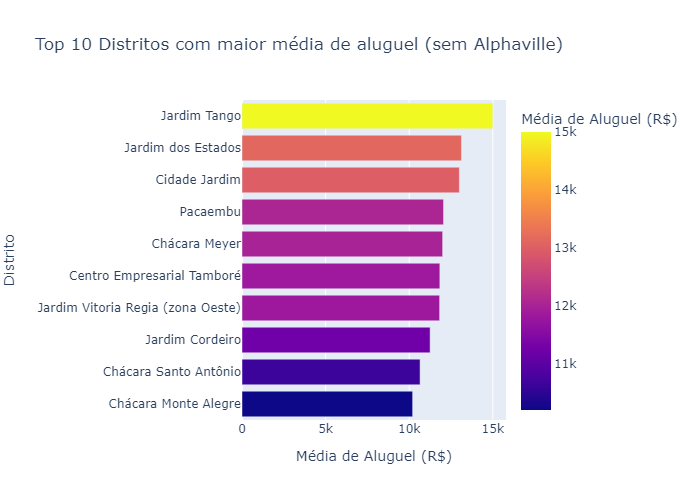

In [52]:
distritos_rent = df.groupby("district")['rent'].mean().reset_index()

distritos_rent = distritos_rent[~distritos_rent["district"].str.lower().str.contains("alphaville")]

top_distritos_rent = distritos_rent.sort_values('rent', ascending=False)[:10]

top_distritos_rent.columns = ["Distrito", "Média de Aluguel"]

fig = px.bar(top_distritos_rent, 
             y='Distrito', 
             x='Média de Aluguel', 
             orientation='h', 
             title='Top 10 Distritos com maior média de aluguel (sem Alphaville)',
             labels={'Média de Aluguel':'Média de Aluguel (R$)', 'Distrito':'Distrito'},
             color='Média de Aluguel')

fig.update_yaxes(autorange="reversed")

fig.show(renderer="png")


In [33]:
top_distritos_rent.describe().T

,count,mean,std,min,25%,50%,75%,max
Média de Aluguel,10.0,12093.733333,1368.205816,10205.0,11392.5,11916.666667,12763.5,15000.0


Primeiramente, é importante destacar que existe uma notável diferença entre o primeiro e o décimo bairro do ranking em termos de preços de aluguel. O bairro Jardim Tango, por exemplo, possui uma média de aluguel aproximadamente 1,5 vezes maior do que a média da Chácara Monte Alegre. Ao observarmos apenas os dez bairros mais caros, que já representam um grupo bastante restrito, notamos um desvio padrão significativo de R$1.368,21, o que é considerável para esse conjunto seleto.

Vamos agora analisar a distribuição dos bairros com os aluguéis mais caros, classificados de acordo com as zonas da cidade:

- Zona Leste: Jardim Tango
- Zona Oeste: Pacaembu, Jardim Vitória Régia, Centro Empresarial Tamboré
- Zona Sul: Jardim dos Estados, Cidade Jardim, Chácara Meyer, Jardim Cordeiro, Chácara Santo Antônio, Chácara Monte Alegre

Em resumo, a Zona Sul da cidade abriga os bairros com os aluguéis mais caros, seguida pela Zona Oeste, Leste e Norte. No entanto, é importante ressaltar que São Paulo apresenta diversas disparidades sociais. Por exemplo, a região central da cidade é muito requisitada, apesar de não termos nenhum bairro dessa área no top 10 de aluguéis mais caros. Além disso, é fundamental destacar a grande variabilidade de preços em cada bairro, uma vez que na Zona Sul encontramos bairros de alta classe, mas também áreas onde predominam moradores com renda mais baixa, como é o caso da famosa Favela do Paraisópolis, que faz fronteira com condomínios de luxo como Jardim Vitória Régia, Paço dos Reis e Portal do Morumbi. Essa diversidade reflete a complexa dinâmica imobiliária da cidade.

In [34]:
bottom_distritos_rent = df.groupby("district")['rent'].mean().sort_values(ascending=False)[-10:].reset_index()
bottom_distritos_rent.columns = ["Distrito", "Média de Aluguel"]

bottom_distritos_rent["Média de Aluguel"] = bottom_distritos_rent["Média de Aluguel"]\
.apply(lambda x: "R$ {:,.2f}".format(x))

print("Top 10 Distritos com menor média de aluguel")
print(bottom_distritos_rent)


Top 10 Distritos com menor média de aluguel
              Distrito Média de Aluguel
0     Jardim Vergueiro        R$ 759.00
1     Sítio do Piqueri        R$ 750.00
2        Vila São Luís        R$ 740.00
3           Vila Ramos        R$ 710.00
4  Vila Cardoso Franco        R$ 700.50
5            Vila Lais        R$ 660.00
6        Jardim Maraba        R$ 630.00
7   Jardim Frei Galvão        R$ 629.00
8          Jardim Inga        R$ 600.00
9        Jardim Jaçanã        R$ 500.00


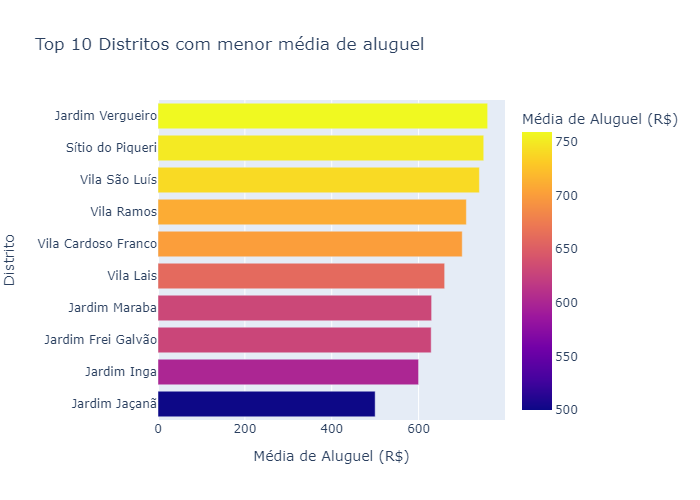

In [53]:
bottom_distritos_rent = df.groupby("district")['rent'].mean().sort_values(ascending=False)[-10:].reset_index()
bottom_distritos_rent.columns = ["Distrito", "Média de Aluguel"]

fig = px.bar(bottom_distritos_rent, 
             y='Distrito', 
             x='Média de Aluguel', 
             orientation='h', 
             title='Top 10 Distritos com menor média de aluguel',
             labels={'Média de Aluguel':'Média de Aluguel (R$)', 'Distrito':'Distrito'},
             color='Média de Aluguel')

fig.update_yaxes(autorange="reversed")

fig.show(renderer="png")



Vamos, mais uma vez, analisar a distribuição por zonas:

- Zona Leste: Vila Cardoso Franco, Vila Lais, Jardim Frei Galvão
- Zona Oeste: Vila São Luis, Vila Ramos
- Zona Sul: Jardim Vergueiro, Jardim Maraba, Jardim Inga
- Zona Norte: Sítio do Piqueri, Jardim Jaçanã



É evidente que a composição deste ranking sofreu uma notável alteração, com uma presença mais expressiva da Zona Leste, o que era previsível, dado seu caráter periférico na cidade de São Paulo. Vale ressaltar a presença significativa da Zona Sul como a segunda zona mais representada, o que chama a atenção para as disparidades socioeconômicas nessa área.

#### Média de aluguel por quantidade de quartos

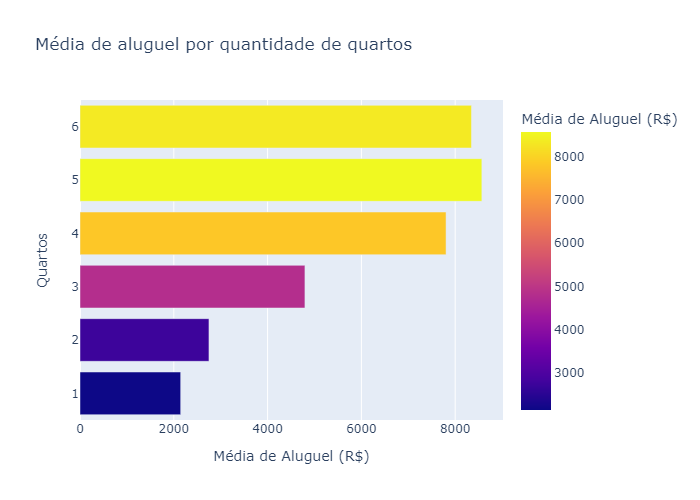

In [54]:
bedroom_rent = df.groupby("bedrooms")['rent'].mean().sort_values(ascending=False).reset_index()
bedroom_rent.columns = ["Quartos", "Média de Aluguel"]

fig = px.bar(bedroom_rent, 
             y='Quartos', 
             x='Média de Aluguel', 
             orientation='h', 
             title='Média de aluguel por quantidade de quartos',
             labels={'Média de Aluguel':'Média de Aluguel (R$)', 'Quartos':'Quartos'},
             color='Média de Aluguel')

fig.show(renderer="png")


Uma conclusão quase que óbvia, porém que deve ser ressaltada é o fator de o preço do aluguel acompanhar o número de quartos presentes.

#### Média de aluguel por tipo de imóvel

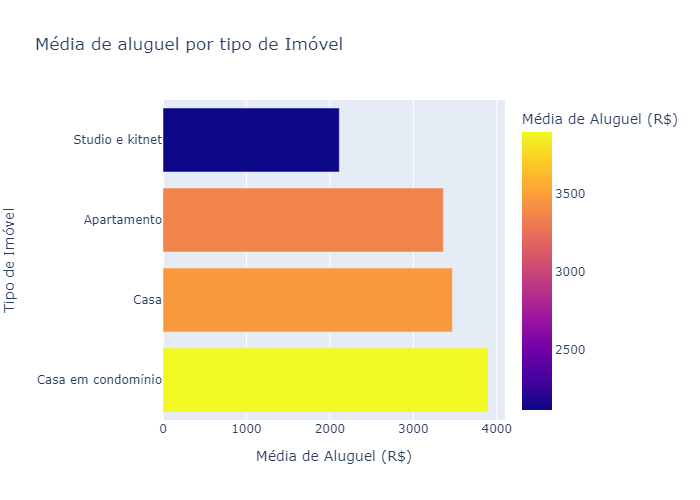

In [55]:
tipo_rent = df.groupby("type")['rent'].mean().sort_values(ascending=False).reset_index()
tipo_rent.columns = ["Tipo de Imóvel", "Média de Aluguel"]

fig = px.bar(tipo_rent, 
             y='Tipo de Imóvel', 
             x='Média de Aluguel', 
             orientation='h', 
             title='Média de aluguel por tipo de Imóvel',
             labels={'Média de Aluguel':'Média de Aluguel (R$)', 'Tipo de Imóvel':'Tipo de Imóvel'},
             color='Média de Aluguel')

fig.show(renderer="png")


**Outra conclusão esperada foi o preço mais elevado quando se tem acesso a Casas em condomínios em relação a outros ambientes com menor nível de segurança e conforto**

In [38]:
df.head()

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654


## 4.1 Análise multivariada

**Hora de comparar os bairros ricos com os bairros pobres. Porém, top 10 me parece muito pouco para ter uma noção real da diferença dos imóveis das diferentes classes. Sendo assim, vamos fazer as comparações usando o top 50 dos mais caros e dos mais baratos!**

In [39]:
# 50 bairros mais caros (excluindo Alphaville)
top_distritos_rent = distritos_rent.sort_values("rent", ascending=False)[:50]
top_distritos_rent.columns = ["Distrito", "Média de Aluguel"]
top_aptos = df[df["district"].isin(top_distritos_rent["Distrito"])] #dados da coluna district que fazem match com a coluna distrito desse novo dataframe

# 50 bairros mais baratos
bottom_distritos_rent = distritos_rent.sort_values("rent", ascending=True)[:50]
bottom_distritos_rent.columns = ["Distrito", "Média de Aluguel"]
bottom_aptos = df[df["district"].isin(bottom_distritos_rent["Distrito"])]


display(top_aptos.head()), display(bottom_aptos.head())

,address,district,area,bedrooms,garage,type,rent,total
105,Rua Oscar Freire,Cerqueira César,55,2,0,Apartamento,3950,5097
179,Rua Padre Lebret,Jardim Leonor,87,1,2,Apartamento,4500,6010
200,Rua Camargo Aranha,Pacaembu,350,4,2,Casa,10400,11660
249,Rua Pamplona,Cerqueira César,49,1,1,Apartamento,3000,3967
278,Rua Augusta,Cerqueira César,35,1,1,Apartamento,2800,3661


,address,district,area,bedrooms,garage,type,rent,total
219,Rua Adele Zarzur,Jardim São José (zona Norte),50,1,0,Casa,850,887
489,Rua das Águias Reais,Vila Cardoso Franco,50,2,1,Apartamento,791,1212
538,Rua Celeste Fernandes Dalphorno,Jardim Rosana,40,1,0,Casa,800,949
639,Rua Ulisses Paschoal,Jardim Lourdes (zona Sul),15,1,0,Studio e kitnet,882,1009
1005,Rua Amorim Castro,Vila São Luís,15,1,0,Studio e kitnet,740,1196


(None, None)

**Aluguel dos imóveis por classe**

C:\Users\osval\AppData\Local\Temp\ipykernel_21484\1197864917.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\osval\AppData\Local\Temp\ipykernel_21484\1197864917.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



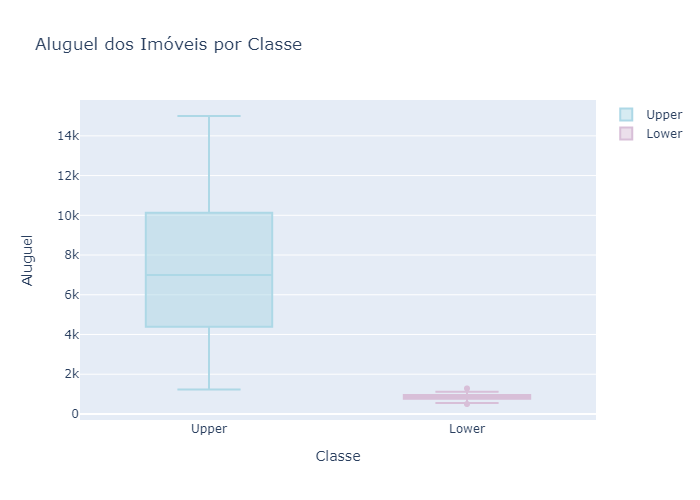

In [56]:
top_aptos["class"] = "Upper"
bottom_aptos["class"] = "Lower"

fig = go.Figure()

fig.add_trace(go.Box(
    x=top_aptos["class"],
    y=top_aptos["rent"],
    name="Upper",
    boxpoints="outliers",
    marker_color='lightblue'
))

fig.add_trace(go.Box(
    x=bottom_aptos["class"],
    y=bottom_aptos["rent"],
    name="Lower",
    boxpoints="outliers",
    marker_color='thistle'
))

fig.update_layout(
    xaxis=dict(title="Classe"),
    yaxis=dict(title="Aluguel"),
    title="Aluguel dos Imóveis por Classe",
    showlegend=True
)

fig.show(renderer="png");


Como se pode ver, existe uma grande discrepância entre os valores de alugueis pagos entre a classe mais e a mais pobre.

**Por tipo de imóvel**

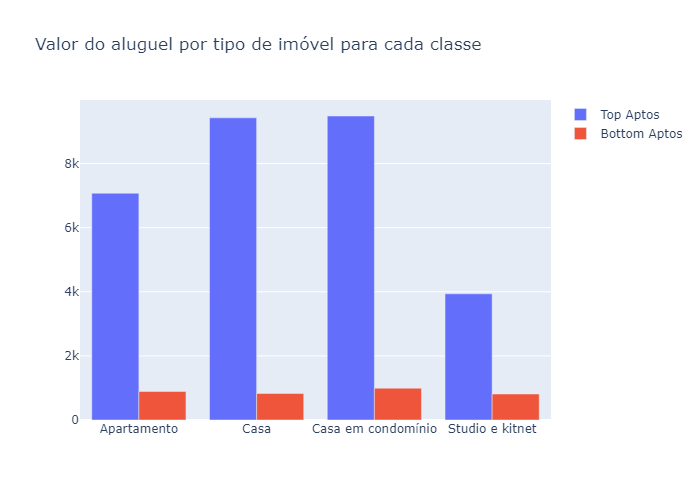

In [58]:
import plotly.graph_objects as go

rent_by_type_top = top_aptos.groupby("type")["rent"].mean().reset_index()
rent_by_type_bottom = bottom_aptos.groupby("type")["rent"].mean().reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(
    x=rent_by_type_top["type"],
    y=rent_by_type_top["rent"],
    name="Top Aptos"
))

fig.add_trace(go.Bar(
    x=rent_by_type_bottom["type"],
    y=rent_by_type_bottom["rent"],
    name="Bottom Aptos"
))

fig.update_layout(title="Valor do aluguel por tipo de imóvel para cada classe")

fig.show(renderer="png")


**Ou seja, em casas e apartamentos a discrepância entre valores pagos é enorme, enquanto que em Studios e Kitnets há uma impossibilidade de uma maior variação devido a estrutura**


**Por área**

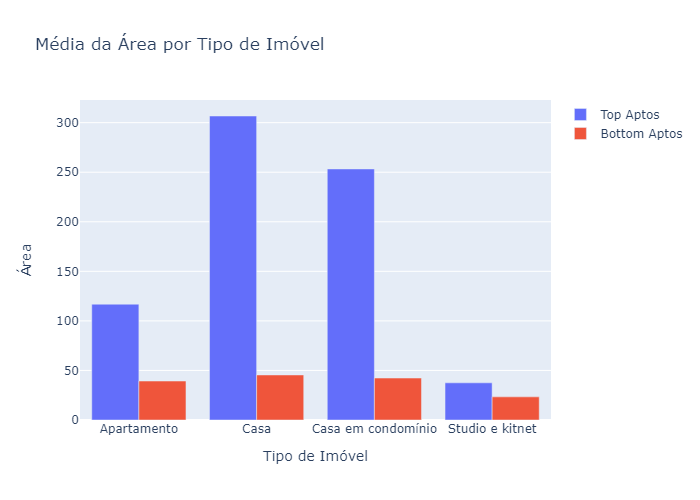

In [59]:
import plotly.graph_objects as go

rent_by_type_top = top_aptos.groupby("type")["area"].mean().reset_index()
rent_by_type_bottom = bottom_aptos.groupby("type")["area"].mean().reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(
    x=rent_by_type_top["type"],
    y=rent_by_type_top["area"],
    name="Top Aptos"
))

fig.add_trace(go.Bar(
    x=rent_by_type_bottom["type"],
    y=rent_by_type_bottom["area"],
    name="Bottom Aptos"
))

fig.update_layout(
    title="Média da Área por Tipo de Imóvel",
    xaxis_title="Tipo de Imóvel",
    yaxis_title="Área"
)


fig.show(renderer="png")



**Ambientes como casas acabam por apresentar uma grande discrepânca entre as áreas, diferente de ambientes considerados por padrão pequenos, como Apartamentos e Studios e Kitnets. As diferenças de aluguel e área só enfatizam o quão grande é a desigualdade social na cidade de Sâo Paulo.**

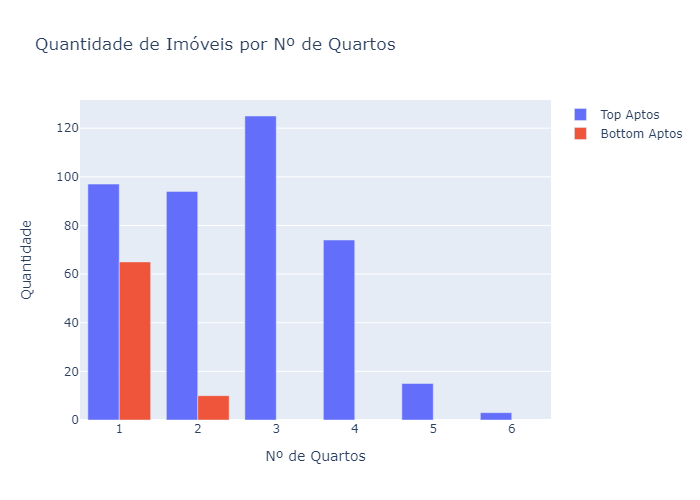

In [60]:
top_aptos_bedrooms = top_aptos["bedrooms"].value_counts().reset_index()
top_aptos_bedrooms.columns = ["Nº de Quartos", "Quantidade"]
top_aptos_bedrooms = top_aptos_bedrooms.sort_values(by="Nº de Quartos", ascending=True)

bottom_aptos_bedrooms = bottom_aptos["bedrooms"].value_counts().reset_index()
bottom_aptos_bedrooms.columns = ["Nº de Quartos", "Quantidade"]
bottom_aptos_bedrooms = bottom_aptos_bedrooms.sort_values(by="Nº de Quartos", ascending=True)


fig = go.Figure()

fig.add_trace(go.Bar(
    x=top_aptos_bedrooms["Nº de Quartos"],
    y=top_aptos_bedrooms["Quantidade"],
    name="Top Aptos"
))

fig.add_trace(go.Bar(
    x=bottom_aptos_bedrooms["Nº de Quartos"],
    y=bottom_aptos_bedrooms["Quantidade"],
    name="Bottom Aptos"
))

fig.update_layout(
    title="Quantidade de Imóveis por Nº de Quartos",
    xaxis_title="Nº de Quartos",
    yaxis_title="Quantidade"
)



fig.show(renderer="png")




**Outra análise interessante, os apartamentos disponíveis mais baratos apresentam no máximo dois quartos.**

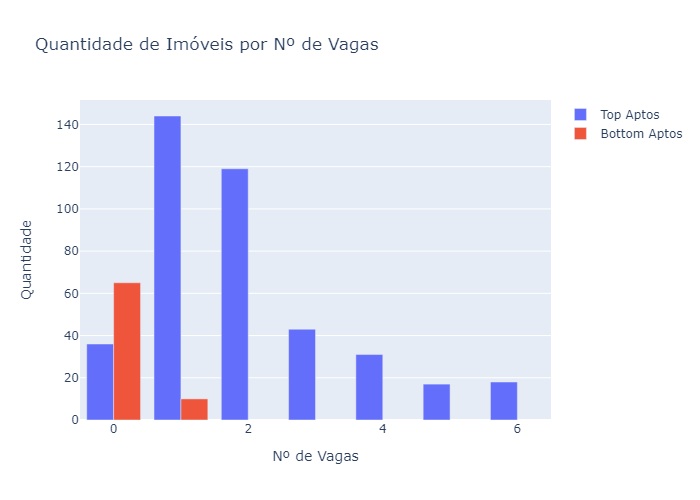

In [61]:
top_aptos_garage = top_aptos["garage"].value_counts().reset_index()
top_aptos_garage.columns = ["Nº de Vagas", "Quantidade"]
top_aptos_garage = top_aptos_garage.sort_values(by="Nº de Vagas", ascending=True)

bottom_aptos_garage = bottom_aptos["garage"].value_counts().reset_index()
bottom_aptos_garage.columns = ["Nº de Vagas", "Quantidade"]
bottom_aptos_garage = bottom_aptos_garage.sort_values(by="Nº de Vagas", ascending=True)


fig = go.Figure()

fig.add_trace(go.Bar(
    x=top_aptos_garage["Nº de Vagas"],
    y=top_aptos_garage["Quantidade"],
    name="Top Aptos"
))

fig.add_trace(go.Bar(
    x=bottom_aptos_garage["Nº de Vagas"],
    y=bottom_aptos_garage["Quantidade"],
    name="Bottom Aptos"
))

fig.update_layout(
    title="Quantidade de Imóveis por Nº de Vagas",
    xaxis_title="Nº de Vagas",
    yaxis_title="Quantidade"
)



fig.show(renderer="png")


**No máximo 1 vaga de garagem para os aluguéis de valores mais baixos. Em uma cidade com tão grande concentração de pessoas, vagas de garagem parecem ser um privilégio.**

## 4.2 Relação entre as variáveis

**Nesse tópico abordaremos a relação entre as variáveis presentes no dataset, com objetivo de determinar a correlação entre elas.**

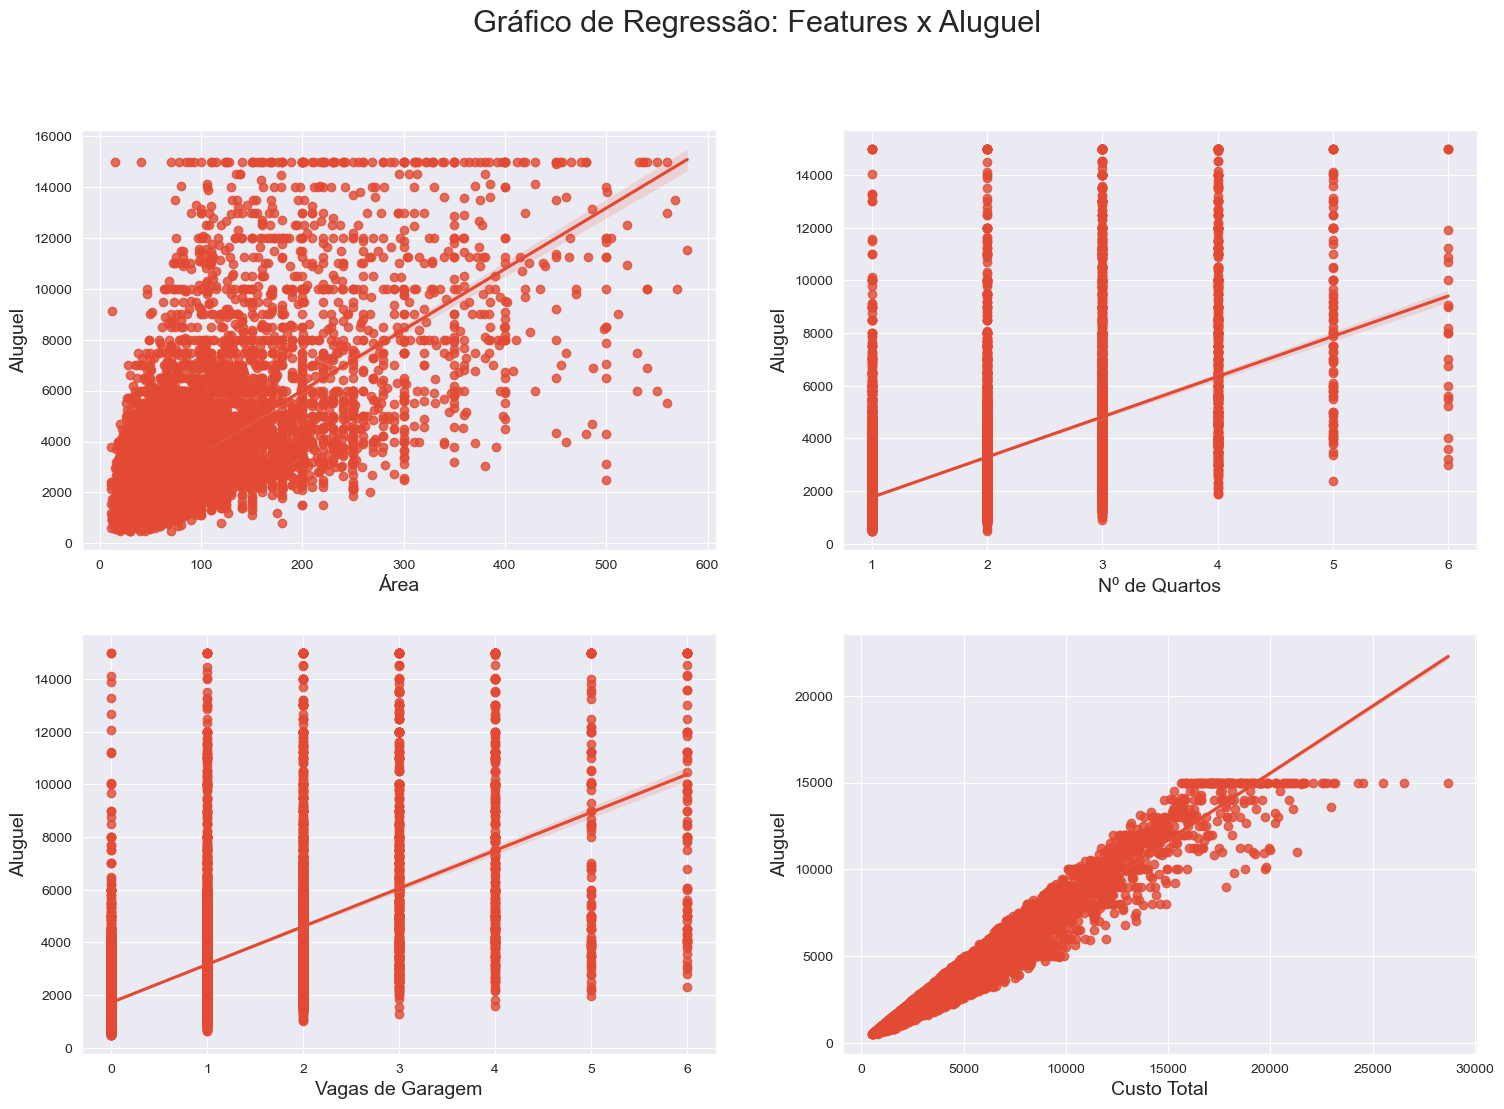

In [45]:
sns.set_style("darkgrid")

fig, axs = plt.subplots(2, 2, figsize=(18, 12))

_ = sns.regplot(x="area", y="rent", data=df, ax=axs[0, 0])
_ = sns.regplot(x="bedrooms", y="rent", data=df, ax=axs[0, 1])
_ = sns.regplot(x="garage", y="rent", data=df, ax=axs[1, 0])
_ = sns.regplot(x="total", y="rent", data=df, ax=axs[1, 1])

_ = axs[0, 0].set_xlabel("Área", fontsize=14)
_ = axs[0, 0].set_ylabel("Aluguel", fontsize=14)
_ = axs[0, 1].set_xlabel("Nº de Quartos", fontsize=14)
_ = axs[0, 1].set_ylabel("Aluguel", fontsize=14)
_ = axs[1, 0].set_xlabel("Vagas de Garagem", fontsize=14)
_ = axs[1, 0].set_ylabel("Aluguel", fontsize=14)
_ = axs[1, 1].set_xlabel("Custo Total", fontsize=14)
_ = axs[1, 1].set_ylabel("Aluguel", fontsize=14)

_ = fig.suptitle("Gráfico de Regressão: Features x Aluguel", fontsize=22)

_ = plt.show()

**Não é possível encontra com correlação entre as variáveis, apenas o Custo Total visualmente parece ter uma correlação elevada, entretanto precisamos calcular o seu valor exato.**

**Matriz de correlação**

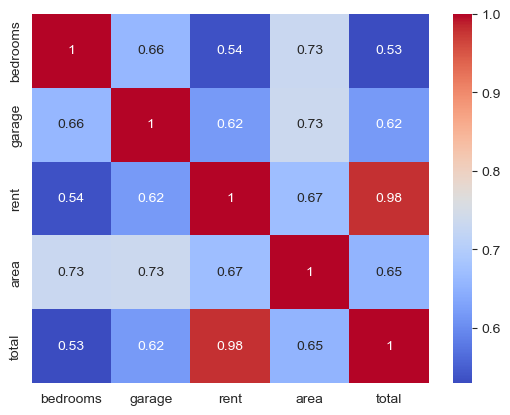

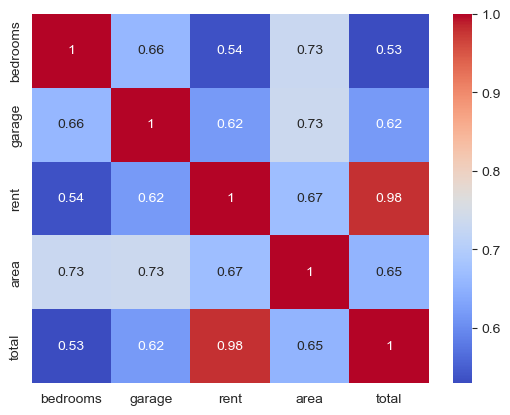

In [46]:
subset_aptos = df[['bedrooms', 'garage', 'rent', 'area', 'total']]

correlation_matrix = subset_aptos.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.show('')



**- A análise visual foi confirmada, a correlação entre total e rent = 0,98 (esperado devido as taxas serem proporcionais ao valor do aluguel)**


**- Garagem como visto anteriormente parece ser um privilégio na cidade de Sâo Paulo, tendo alta correlação com a área do ambiente**

**Features x Aluguel**

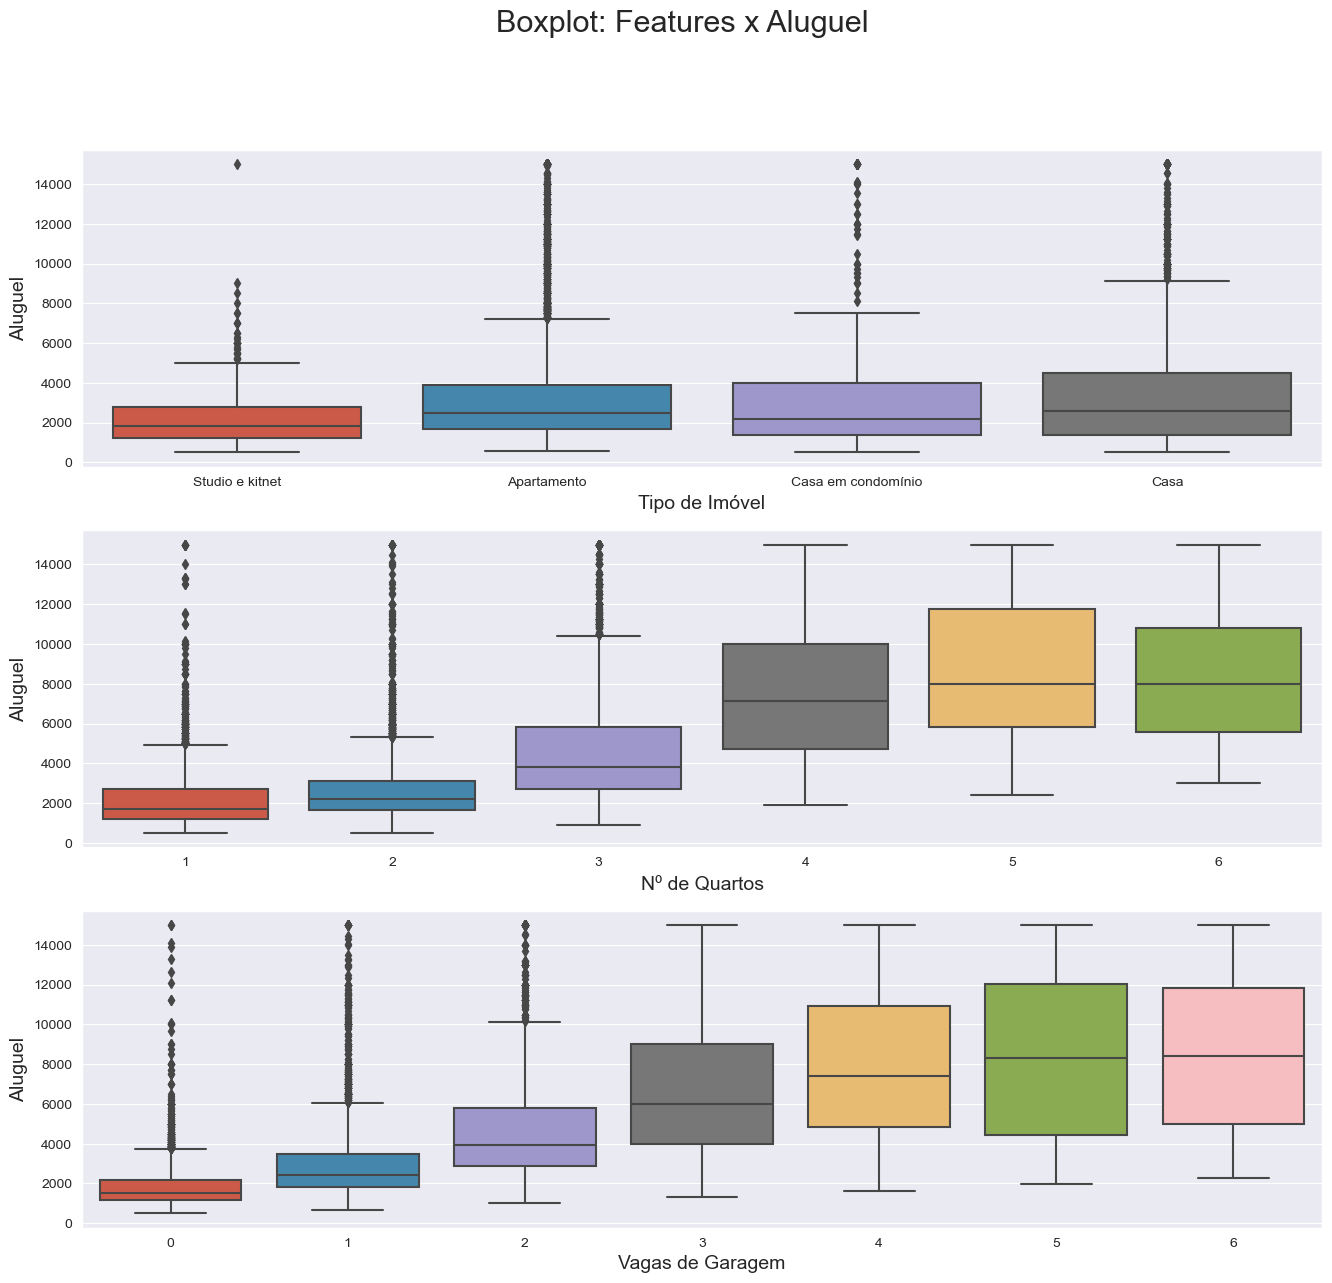

In [47]:
sns.set_style("darkgrid")

fig, axs = plt.subplots(3, 1, figsize=(16, 14))

_ = sns.boxplot(x="type", y="rent", data=df, ax=axs[0])
_ = sns.boxplot(x="bedrooms", y="rent", data=df, ax=axs[1])
_ = sns.boxplot(x="garage", y="rent", data=df, ax=axs[2])

_ = axs[0].set_xlabel("Tipo de Imóvel", fontsize=14)
_ = axs[0].set_ylabel("Aluguel", fontsize=14)
_ = axs[1].set_xlabel("Nº de Quartos", fontsize=14)
_ = axs[1].set_ylabel("Aluguel", fontsize=14)
_ = axs[2].set_xlabel("Vagas de Garagem", fontsize=14)
_ = axs[2].set_ylabel("Aluguel", fontsize=14)

_ = fig.suptitle("Boxplot: Features x Aluguel", fontsize=22)

_ = plt.show()

## Conclusões finais:

- A cidade de São Paulo como já esperado apresenta uma grande desigualdade social, confirmada pelas análises feitas nesse Dataset, na qual enfatizam as diferenças de localização, área, preços e conforto a que os moradores estão expostos.

